In [1]:
ROOT <- '/Users/dsp/dongmei/suppression'
DATA <- sprintf('%s/data', ROOT)

In [2]:
data <- read.csv(sprintf('%s/mpb10km_data.csv', DATA))
head(data)

lon,lat,etopo1,x,y,beetleAcres,host,forest,mStdAge,density,⋯,X20.Jan,PcumOctSep,SprsCosts,SprsAcres,SprsCPA,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2879,40.21671,201.27065,-1000000,-460000,NA,0,0,150.5000,27214.52,⋯,0,3704.248,275000,60.0,4583.333,NA,NA,NA,NA,NA
-124.3038,40.30570,179.37590,-1000000,-450000,NA,0,1,55.5000,31180.24,⋯,0,3634.644,NA,NA,NA,1,1,30.0,2,4
-124.3199,40.39468,323.83456,-1000000,-440000,NA,0,0,10.0000,48738.07,⋯,0,3577.369,NA,NA,NA,NA,NA,NA,NA,NA
-124.3360,40.48366,266.47128,-1000000,-430000,NA,0,1,74.0000,46378.85,⋯,0,3326.268,NA,NA,NA,NA,NA,NA,NA,NA
-124.3522,40.57263,30.87853,-1000000,-420000,NA,0,1,76.2500,13017.31,⋯,0,3122.938,NA,NA,NA,1,1,0.1,0,2
-124.1555,40.14040,296.74728,-990000,-470000,NA,1,1,61.8189,50787.85,⋯,0,3554.745,33666343,24710.5,1362.431,3,1,5762.0,12,84


In [3]:
drop <- c('x', 'y', 'SprsCosts', 'SprsAcres')
data <- data[, -which(names(data) %in% drop)]
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,JanMin,TOctSep,X20.Jan,PcumOctSep,SprsCPA,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2879,40.21671,201.27065,NA,0,0,150.5000,27214.52,0.8361742,0.6666667,⋯,1.3934664,10.44481,0,3704.248,4583.333,NA,NA,NA,NA,NA
-124.3038,40.30570,179.37590,NA,0,1,55.5000,31180.24,0.4923077,0.2500000,⋯,1.3374767,10.67275,0,3634.644,NA,1,1,30.0,2,4
-124.3199,40.39468,323.83456,NA,0,0,10.0000,48738.07,0.7272727,0.6250000,⋯,1.2732506,10.41098,0,3577.369,NA,NA,NA,NA,NA,NA
-124.3360,40.48366,266.47128,NA,0,1,74.0000,46378.85,0.7613636,0.1250000,⋯,1.2720708,10.76958,0,3326.268,NA,NA,NA,NA,NA,NA
-124.3522,40.57263,30.87853,NA,0,1,76.2500,13017.31,0.8783784,0.0000000,⋯,1.3178075,11.26455,0,3122.938,NA,1,1,0.1,0,2
-124.1555,40.14040,296.74728,NA,1,1,61.8189,50787.85,0.5588235,0.0000000,⋯,0.8641355,10.39499,0,3554.745,1362.431,3,1,5762.0,12,84


In [4]:
names(data)

[1] "lon"         "lat"         "etopo1"      "beetleAcres" "host"       
 [6] "forest"      "mStdAge"     "density"     "PctLarge"    "PctOld"     
[11] "vcc"         "mfri"        "prs"         "pms"         "pls"        
[16] "GAP1"        "GAP2"        "GAP3"        "vpd"         "cwd"        
[21] "maxAugT"     "summerP0"    "Tmean"       "mi"          "Tvar"       
[26] "wd"          "AugTmean"    "OctTmin"     "AugMaxT"     "AugTmax"    
[31] "Acs"         "MarMin"      "ddAugJun"    "ddAugJul"    "JanTmin"    
[36] "PPT"         "summerP2"    "TMarAug"     "X20.Mar"     "fallTmean"  
[41] "MarTmin"     "maxT"        "Tmin"        "winterMin"   "summerTmean"
[46] "Pmean"       "summerP1"    "minT"        "JanMin"      "TOctSep"    
[51] "X20.Jan"     "PcumOctSep"  "SprsCPA"     "SprsFires"   "PctSprs"    
[56] "SprsAcre"    "SprsDays"    "OutDays"

In [5]:
# vcc values > 6 indicate areas of no vegetation, replace with 0s
data$vcc[data$vcc > 6] <- 0
data$prs[data$prs > 20] <- 0
data$prs[data$pms > 20] <- 0
data$prs[data$pls > 20] <- 0

# Mean fire return interval where there are no trees is effectively 
# infinite--set to 22 (> 1000 years)
data$mfri[data$mfri > 22] <- 22

data$beetleAcres[is.na(data$beetleAcres)] <- 0
data$mStdAge[is.na(data$mStdAge) & data$forest == 0] <- 0
data$density[is.na(data$density) & data$forest == 0] <- 0
data$PctLarge[is.na(data$PctLarge) & data$forest == 0] <- 0
data$PctOld[is.na(data$PctOld) & data$forest == 0] <- 0

data$SprsCPA[is.na(data$SprsCPA) & data$forest == 0] <- 0
data$SprsFires[is.na(data$SprsFires) & data$forest == 0] <- 0
data$PctSprs[is.na(data$PctSprs) & data$forest == 0] <- 0
data$SprsAcre[is.na(data$SprsAcre) & data$forest == 0] <- 0
data$SprsDays[is.na(data$SprsDays) & data$forest == 0] <- 0
data$OutDays[is.na(data$OutDays) & data$forest == 0] <- 0

In [6]:
names(data)[which(names(data) == 'X20.Mar')] <- 'Mar20'
names(data)[which(names(data) == 'X20.Jan')] <- 'Jan20'

In [7]:
dim(data)

[1] 36965    58

In [8]:
sum(complete.cases(data))

[1] 30160

In [9]:
comp <- data[complete.cases(data), ]

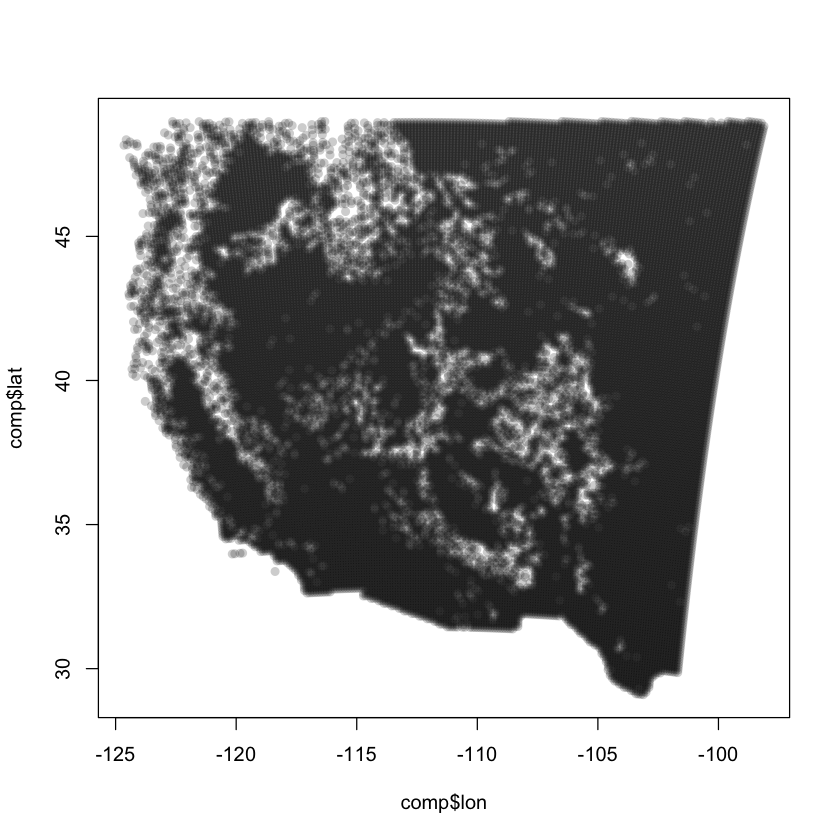

In [12]:
plot(comp$lon, comp$lat, pch=16, col=rgb(0, 0, 0, 0.2))

In [13]:
for (field in names(data)) {
  cat(sprintf('%20s: %d\n', field, sum(is.na(data[, field]))))
}

                 lon: 0
                 lat: 0
              etopo1: 0
         beetleAcres: 0
                host: 0
              forest: 0
             mStdAge: 172
             density: 31
            PctLarge: 167
              PctOld: 1160
                 vcc: 79
                mfri: 79
                 prs: 79
                 pms: 78
                 pls: 78
                GAP1: 0
                GAP2: 0
                GAP3: 0
                 vpd: 56
                 cwd: 56
             maxAugT: 56
            summerP0: 56
               Tmean: 56
                  mi: 56
                Tvar: 56
                  wd: 56
            AugTmean: 56
             OctTmin: 56
             AugMaxT: 56
             AugTmax: 56
                 Acs: 56
              MarMin: 56
            ddAugJun: 56
            ddAugJul: 56
             JanTmin: 56
                 PPT: 56
            summerP2: 56
             TMarAug: 56
               Mar20: 56
           fallTmean: 56
     

In [14]:
write.csv(comp, sprintf('%s/mpb10km_data_clean.csv', DATA))